# Techniques of handling missing values

##### 1) Mean / Median / Mode Imputation
##### 2) Random Sample Imputation
##### 3) Capturing Nan values with a New feature
##### 4) End of Distribution Imputation
##### 5) Arbitary Imputation
##### 6) Frequent Categories Imputation

# 2) Random Sample Imputation
##### AiM: replacing the NaN values with Random observation
##### Applied for the data of type: Missing Completely at Random (MCAR)

In [20]:
import pandas as pd
#Read Titanic Training Data Set
df = pd.read_csv('C:/Users/Kapil Wanaskar/Data Sets/titanic_train (1).csv')
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [21]:
#focusing on only 3 columns
df = pd.read_csv('C:/Users/Kapil Wanaskar/Data Sets/titanic_train (1).csv', usecols=['age','fare','survived'])
df.head() # reading only top 5 rows

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [22]:
df.isnull().sum() # finding NUMBER of null values in each columns

age         174
fare          1
survived      0
dtype: int64

In [23]:
df.isnull().mean() # finding PERCENTAGE of null values in each columns

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [24]:
df['age'] #reading "age" column

0       NaN
1      38.0
2      30.0
3      54.0
4      40.0
       ... 
845    55.0
846    58.0
847    24.0
848     3.0
849    52.0
Name: age, Length: 850, dtype: float64

In [25]:
df['age'].dropna() #Dropping Nan values in "age" column

1      38.0
2      30.0
3      54.0
4      40.0
5      28.0
       ... 
845    55.0
846    58.0
847    24.0
848     3.0
849    52.0
Name: age, Length: 676, dtype: float64

In [26]:
df['age'].isnull().sum() #measuring number of NaN / Null values in 'age' column

174

In [27]:
df['age'].dropna().sample() #choosing random SAMPLE from the Non-Null values in the 'age' column
#o/p is dynamic i.e - changes everytime

633    21.0
Name: age, dtype: float64

In [28]:
df['age'].dropna().sample(df['age'].isnull().sum()) #intubating Random values at previous Nan places
# but, #o/p is changing after each execution

12     56.0
317    23.0
508    32.0
236    30.0
613    18.0
       ... 
447    60.0
275    23.0
92     18.0
667     8.0
371    31.0
Name: age, Length: 174, dtype: float64

In [29]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0) 
#o/p is NOT changing after each execution

716    27.0
39     29.0
446    25.0
240     8.0
508    32.0
       ... 
801    47.0
669     9.0
768    21.0
16     40.0
250    48.0
Name: age, Length: 174, dtype: float64

In [30]:
#create a function which will impute NAN values
def impute_nan(df,variable,median):
# df,variable,median ~ are parameters
    df[variable+"_median"] = df[variable].fillna(median) # filling NAN values with Median
    
median = df.age.median()    
impute_nan(df,'age',median)
df  #displaying "age_median" 
#as discussed in Video 6) Mean, Median, Mode Imputation - How to handle Missing Data.ipynb

,age,fare,survived,age_median
0,NaN,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0
...,...,...,...,...
845,55.0,50.0000,0,55.0
846,58.0,29.7000,0,58.0
847,24.0,26.0000,1,24.0
848,3.0,13.7750,0,3.0


In [31]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
#replace 'age' with 'variable' in previous command: df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0) 
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) 
    

In [32]:
df[df['age'].isnull()].index #Pick Up Index of all Nan values in Age column

Int64Index([  0,  17,  21,  28,  30,  31,  33,  38,  41,  46,
            ...
            763, 778, 780, 787, 794, 814, 820, 821, 828, 836],
           dtype='int64', length=174)

In [33]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) 
#pandas need to have same index in order to merge the dataset
#replace 'age' with 'variable' in previous command: df[df['age'].isnull()].index
    random_sample.index = df[df[variable].isnull()].index #Pick Up Index of all Nan values in any Variable column

In [34]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample # Replacing NAN values with Random Sample

In [35]:
median = df.age.median()
median

28.0

In [36]:
impute_nan(df,'age',median)
df #displaying both "age_median" and "age_random"
#Ta-da - finally Magic Happens :D

,age,fare,survived,age_median,age_random
0,NaN,7.7333,1,28.0,27.0
1,38.0,8.6625,0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0
4,40.0,13.0000,0,40.0,40.0
...,...,...,...,...,...
845,55.0,50.0000,0,55.0,55.0
846,58.0,29.7000,0,58.0,58.0
847,24.0,26.0000,1,24.0,24.0
848,3.0,13.7750,0,3.0,3.0


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

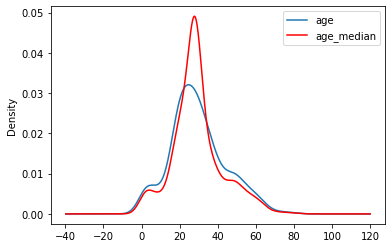

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111) # defining axes
df['age'].plot(kind='kde', ax=ax) #plotted 1st, default colored, graph
# 'age_median' is replaced with age_random
df.age_median.plot(kind='kde', ax=ax, color = 'red') #plotted age_median, red colored, graph
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #Naming / labeling the multi plots

# "age" and "age_median" do NOT have similar data distribution

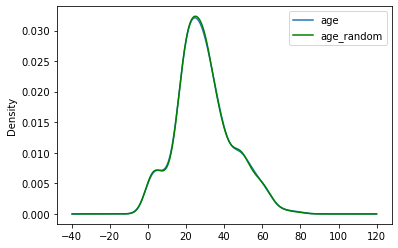

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111) # defining axes
df['age'].plot(kind='kde', ax=ax) #plotted 1st, default colored, graph
# 'age_median' is replaced with age_random
df.age_random.plot(kind='kde', ax=ax, color = 'green') #plotted age_random, GREEN colored, graph
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #Naming / labeling the multi plots

# "age" and "age_random" have almost similar data distribution

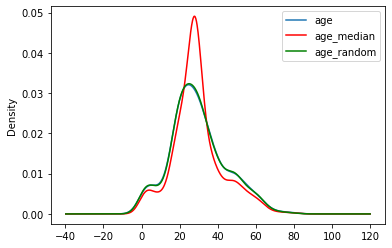

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111) # defining axes
df['age'].plot(kind='kde', ax=ax) #plotted 1st, default colored, graph
# 'age_median' is replaced with age_random
df.age_median.plot(kind='kde', ax=ax, color = 'red') #plotted age_median, RED colored, graph
df.age_random.plot(kind='kde', ax=ax, color = 'green') #plotted age_random, GREEN colored, graph
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #Naming / labeling the multi plots

# "age" and "age_random" have almost similar data distribution

### in this situation,

Technique 2) Random Sample Imputation

performed better than

Technique 1) Mean / Median / Mode Imputation

### ADVANTAGE
of Technique 2) Random Sample Imputation

##### 1) Easy to Implement
##### 2) Less distortion in variance wrt "Technique 1) Mean / Median / Mode Imputation"

## Disadvantage
1) In every situation , randomness need not give good result